# Using APIs and JSON Data

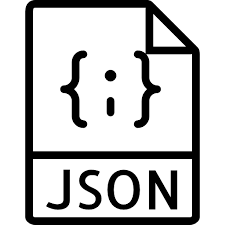

# Objectives

* Interact with JSON files using the `json` library
* Retrieve data from APIs using the `requests` library
* Parse API responses

# What is JSON?

JSON stands for Java Script Object Notation. 

JSON objects are one common way that data is transmitted over the web.  It is notable for being lightweight, which makes it [preferred](https://stackoverflow.com/questions/383692/what-is-json-and-why-would-i-use-it), generally, over XML.

## JSON Format

JSON objects store data in a format similar to a nested Python dictionary. The JSON format makes it easy to store as a file, transfer between users, and use in other languages.

For more information about the syntax of JSON files, check out this [link](https://www.json.org/json-en.html) to the JSON website.

## Loading the JSON file

For this example, we've created a `new_releases.json` file containing data on 20 newly released music albums. We got this from the Spotify API - we'll explain what this means later. 

Let's begin by importing the `json` package, opening a file with python's `open()` function, and then loading that data from the JSON file into a new `data` object.

In [ ]:
import json
import pandas as pd
import requests

In [ ]:
with open('data/new_releases.json') as f:
    data = json.load(f)

The Spotify API returned the data in the form of JSON object, which the `json` module transforms into a Python object.

## Exploring JSON Schemas  

Recall that JSON files have a nested structure. The deepest levels of our object will contain individual values: numbers, booleans or strings. These in turn will be stored in the equivalents of Python lists and dictionaries, usually with many levels of nesting. 

If you try to look at a raw JSON file, you will likely have a hard time understanding the structure. To more easily make sense of it, we will proceed through each level methodically.

In [ ]:
## This will look messy
print(data)

To start exploring, let's check the type of our new `data` object and start mapping out the hierarchy.

In [ ]:
type(data)

In [ ]:
data.keys()

In this case, there is only a single key, 'albums', so we'll continue on down the pathway exploring and mapping out the hierarchy. Once again, let's start by checking the type of this nested data structure.

In [ ]:
type(data['albums'])

In [ ]:
data['albums'].keys()

At this point, things are starting to look something like this: 

![](images/json_diagram1.JPG)

At this point, if we were to continue checking individual data types, we have a lot to go through. To simplify this, let's use a for loop:

In [ ]:
for key, value in data['albums'].items():
    print(key, type(value))

Adding this to our diagram we now have something like this:
![](images/json_diagram2.JPG)


Let's look at the `items` list - this contains the album information. 

Sidebar: lists are technically called "arrays" in the JSON specification, but in Python work just like lists

In [ ]:
type(data['albums']['items'])

In [ ]:
data['albums']['items'][0]

We access values as we would for nested lists or dictionaries in Python.

In [ ]:
data['albums']['items'][0].keys()

In [ ]:
data['albums']['items'][0]['artists'][0]['name']

In [ ]:
data['albums']['items'][1]['artists'][0]['name']

Because the JSON object is a dicitonary, we can create a dataframe from it, like we have learned previously:

## Moving into a `pandas` DataFrame

In [ ]:
df = pd.DataFrame(data['albums']['items'])
df.head()

What do you notice about the values in this dataframe?

In [ ]:
df['num_artists'] = [len(artist_list) for artist_list in df['artists']]

In [ ]:
df.head()

In [ ]:
df['artists'].head(1)

In [ ]:
df['artist_name1'] = [val[0]['name'] for val in df['artists']]

In [ ]:
df.head()

# APIs

The term **Application Program Interfaces**, or APIs, is exceedingly general. It applies to any interaction between applications or between an application and a user. One might speak of the "matplotlib API" to describe proper plotting syntax but also of APIs that govern the interaction between various steps of a data pipeline: between a database server and a remote client, between a local machine and a cloud storage bucket, etc.

APIs are commonly used to retrieve data from remote websites. Sites like Reddit, Twitter, and Facebook all offer certain data through their APIs. 

To use an API, you make a request to a remote web server, and retrieve the data you need.

We'll use the `requests` library to access web locations.

![](images/logo.png)

Below is how you would install and import the requests library before making any requests. 
```python
# Uncomment and install requests if you dont have it already
# conda install -c anaconda requests

# Import requests to working environment
import requests
```

## The `.get()` Method

Now that we have `requests` library ready in our working environment, we can start making some requests using the `.get()` method as shown below.

We can use a GET request to retrieve information from the OpenNotify API.

In [ ]:
import requests 

# Make a get request to get the latest position of the
# International Space Station (ISS) from the opennotify api.

url = 'http://api.open-notify.org/iss-now.json'
iss_response = requests.get(url)

This creates a `Response` object containing the response that we received

In [ ]:
type(iss_response)

The `Response` object contains a bunch of information about the response we got from the server. For example, it includes the status code, which can be helpful for diagnosing request issues. 200 means OK - we'll discuss others later.

In [ ]:
iss_response.status_code

The `Response` object also contains the data received from our request in the `content` attribute. 

In [ ]:
iss_response.content

OpenNotify has several API **endpoints**. An endpoint is a server route that is used to retrieve different data from the API. For example, the `/comments` endpoint on the Reddit API might retrieve information about comments, whereas the `/users` endpoint might retrieve data about users. To access them, you would add the endpoint to the base url of the API.

In [ ]:
# Let's check out who is in space right now!

url = 'http://api.open-notify.org/astros.json'
astro_response = requests.get(url)
print(astro_response.status_code)

In [ ]:
astro_response.content

See the `b'` at the beginning? The `content` is stored in a "byte literal" format, not a Python dictionary.

In [ ]:
astro_response.content.keys()

In [ ]:
type(astro_response.content)

We can look at the `test` attribute instead, but this still gives us a string, not a dictionary.

In [ ]:
astro_response.text

In [ ]:
print(astro_response.text)
print(type(astro_response.text))

To address this, we will use the `.json()` method to get a dictionary we can work with.

In [ ]:
astro_data = astro_response.json()
astro_data.keys()

**Activity**: Create a list `astro_names` containing the astronauts' names.

<details>
    <summary>
        Answer here
    </summary>
    
    astro_people = astro_data['people']
    
    astro_names = [person['name'] for person in astro_people]

</details>

In [ ]:
astro_people = astro_data['people']
astro_names = [person['name'] for person in astro_people]

print(f"There are {astro_data['number']} people in the space station right now!")
print(f"Their names are {', '.join(astro_names)}.")

GET is by far the most used HTTP method. We can use GET request to retrieve data from any destination.

## Status Codes
The request we make may not always be successful. The best way is to check the status code which gets returned with the response. Here is how you would do this. 

In [ ]:
astro_response.status_code

[Status Code Info](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status) <br/>
[Status Code Info with Dogs](https://httpstatusdogs.com/) <br/>
[Wikipedia on Status Codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)

So this is a good check to see if our request was successful. Depending on the status of the web server, the access rights of the clients and availibility of requested information. A web server may return a number of status codes within the response. Wikipedia has an exhaustive details on all these codes.

### Common status codes

* 200 — everything went okay, and the result has been returned (if any)
* 301 — the server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an endpoint name is changed.
* 401 — the server thinks you’re not authenticated. This happens when you don’t send the right credentials to access an API.
* 400 — the server thinks you made a bad request. This can happen when you don’t send along the right data, among other things.
* 403 — the resource you’re trying to access is forbidden — you don’t have the right permissions to see it.
* 404 — the resource you tried to access wasn’t found on the server.

### Hitting the right endpoint

We’ll now make a GET request to http://api.open-notify.org/iss-pass.json.

In [ ]:
iss_pass_url = 'http://api.open-notify.org/iss-pass.json'
response = requests.get(iss_pass_url)
response.status_code

We can look at `content` to see if the server told us why there was a problem.

In [ ]:
response.content

## Query Parameters

If you look at the [documentation](http://open-notify.org/Open-Notify-API/ISS-Pass-Times/), we see that the ISS Pass endpoint requires two parameters.

We can do this by adding an optional keyword argument, params, to our request. In this case, there are two parameters we need to pass:

* lat — The latitude of the location we want.
* lon — The longitude of the location we want.

We can make a dictionary with these parameters, and then pass them into the `requests.get()` method. We’ll make a request using the coordinates of New York City, and see what response we get.

We can also add the query parameters to the url, like this: http://api.open-notify.org/iss-pass.json?lat=47.6&lon=-122.3. However, it’s almost always preferable to pass the parameters as a dictionary, because `requests` takes care of some potential issues, like properly formatting the query parameters.

We'll add parameters to the get method in the form of a dictionary with two keys, lat and long.

In [ ]:
# Our code here

# Print the content of the response (the data the server returned)


# This gets the same data as the command above:
# requests.get("http://api.open-notify.org/iss-pass.json?lat=40.71&lon=-74")

# Secure APIs: Generating Access Tokens

Many APIs have security measures to make sure their APIs aren't abused. Let's show you how to generate an access token so you can use such secure APIs.

Point your browser over to this [yelp page](https://www.yelp.com/developers/v3/manage_app) and start creating an app in order to obtain an api access token:


![](./images/yelp_app.png)

You can either sign in to an existing Yelp account, or create a new one, if needed.

On the page you see above, simply fill out some sample information such as "Flatiron Edu API Example" for the app name, or whatever floats your boat. Afterwards, you should be presented with an API key that you can use to make requests.

With that, it's time to start making some API calls!

## An Example Request with OAuth 

[OAuth](https://en.wikipedia.org/wiki/OAuth) is a common standard used by companies to provide API access. "Auth" refers to two processes:

* Authentication: Verifying your identity
* Authorization: Giving you access to a resource

## Storing your API Key Securely

Handling your security credentials properly will avoid accidentally exposing them to people who might use them for malicious purposes. While you probably can't get in too much trouble with Yelp, it's a good practice to develop. It becomes especially tricky and important when using public Git repositories. Here are the steps we recommend: 

1. Create a hidden `~/.secret/` folder in your user folder
2. Put your credentials in a .json file in the `~/.secret/` folder (e.g. `~/.secret/yelp-api.json`

In [ ]:
with open('/Users/jamesirving/.secret/yelp_api.json') as f:
    creds = json.load(f)

In [ ]:
creds.keys()

## Making our Request

[Yelp API Documentation](https://www.yelp.com/developers/documentation/v3/get_started)

Let's look at an example request and dissect it into its consituent parts:

In [ ]:
url = 'https://api.yelp.com/v3/businesses/search'
term = 'Hamburgers'
SEARCH_LIMIT = 10
headers = {
    'Authorization': 'Bearer ' + creds['api_key']
}

url_params = {
    'term': term,
    'location': 'Seattle+WA',
    'limit': SEARCH_LIMIT,
    'offset': 0
}
response = requests.get(url, headers=headers, params=url_params)
print(response.status_code)

## Breaking Down the Request

As you can see, there are three main parts to our request.  
  
They are:
* The URL
* The header
* The parameters
  
The URL is found in the documentation (`https://api.yelp.com/v3`) and we are using the Business Search endpoint (`/businesses/search`).

The header is required by the Yelp API for authorization. It has a strict form where 'Authorization' is the key and 'Bearer YourApiKey' is the value. We make a `header` dictionary to pass into our `.get()` method.

The parameters contain information we pass into the query to get the data we want. Valid key parameters by which to structure your queries, are described in the [Yelp API Documentation](https://www.yelp.com/developers/documentation/v3/get_started). We make a `url_params` dictionary to pass into our `.get()` method, which then adds the query parameters to the URL.

**Important note re: parameters**: We need to replace spaces with "+" - this is a common API requirement because URLs cannot contain spaces. (Note that the header itself isn't directly added into the URL itself and as such, the space between 'Bearer' and YourApiKey is fine.)


## The Response

As before, our response object has both a status code, as well as the data itself. With that, let's start with a little data exploration!

In [ ]:
response.json()

**Activity**: Make a DataFrame `yelp_df` with the business data from the Yelp response.
<details>
    <summary>
        Answer code
    </summary>
    
    yelp_data = response.json()
    yelp_df = pd.DataFrame(yelp_data['businesses'])
</details>

In [ ]:
## Your code here


In [ ]:
yelp_df.head()

**Activity**: Add columns to `yelp_df` containing the latitudes and longitudes.


<details>
    <summary>
        Answer code - CL
    </summary>
    
    lat = [float(business['coordinates']['latitude']) for business in yelp_data['businesses']]
    long = [float(business['coordinates']['longitude']) for  business in yelp_data['businesses']]
    yelp_df['lat'] = lat
    yelp_df['long'] = long
</details>



<details>
    <summary>
        Answer code - James
    </summary>
<code>    
def get_lat_long(row):
    row['latitude'] = row['coordinates']['latitude']
    row['longitude'] = row['coordinates']['longitude']
    return row
yelp_df = yelp_df.apply(get_lat_long,axis=1)</code>
</details>




In [ ]:
## Your code here


In [ ]:
yelp_df.head()